In [2]:
import torch
from torchvision import transforms
from ClassComp.data_utils.loaders import get_mnist, get_dataloader
from ClassComp.experiments.train import train_binary_classifier, train_vae


In [ ]:
torch.cuda.is_available()

### Error analysis

In [ ]:
from ClassComp.experiments.error_analysis import error_analysis
import pickle
import copy

def update_running_average(results, cumulative_sums, counts):
    """
    Update the running average of the results in the dictionary.

    Args:
        results (dict): The dictionary containing the current results.
        cumulative_sums (dict): The dictionary storing cumulative sums of values.
        counts (int): The current count of iterations.

    Returns:
        dict: The updated running averages.
    """
    # Update cumulative sums and counts
    for key, values in results.items():
        if key not in cumulative_sums:
            cumulative_sums[key] = [0.0] * len(values)  # Initialize sums if not present
        
        # Update cumulative sums
        for i in range(len(values)):
            cumulative_sums[key][i] += values[i]
    
    # Compute running averages
    running_averages = {}
    for key, sums in cumulative_sums.items():
        running_averages[key] = [s / counts for s in sums]
    
    return running_averages

# Example usage
n_runs = 10  # Number of runs
cumulative_sums = {}
counts = 0
final_averages = {}

for _ in range(n_runs):
    # Simulate running the function
    results = error_analysis(
        [-1, 1],
        3,
        dataset_size=10,
        image_size=32,
        batch_size=4,
        seed=counts + 1,
    )
    counts += 1
    final_averages = update_running_average(results, cumulative_sums, counts)

print("Final Averages:", final_averages)


# with open("results/errors/res_1_3.pkl", "wb") as f:
#     pickle.dump(res, f)
#     f.close()

# res = error_analysis(
#     [-0.2, 0.2],
#     3,
#     dataset_size=500,
#     image_size=32,
#     batch_size=16,
# )

# with open("results/errors/res_02_3.pkl", "wb") as f:
#     pickle.dump(res, f)
#     f.close()

Training VGG


Epoch [1/5], Loss: 3.0506, Training Accuracy: 60.00%, Time: 1.09s, Gradient Norm: 242.5100
Validation Accuracy: 49.60%


Epoch [2/5], Loss: 0.5568, Training Accuracy: 70.00%, Time: 0.23s, Gradient Norm: 49.3263
Validation Accuracy: 49.60%


Epoch [3/5], Loss: 0.1019, Training Accuracy: 100.00%, Time: 0.22s, Gradient Norm: 8.0965
Validation Accuracy: 49.60%


Epoch [4/5], Loss: 11.8014, Training Accuracy: 40.00%, Time: 0.23s, Gradient Norm: 614.0868
Validation Accuracy: 49.60%


Epoch [5/5], Loss: 0.6623, Training Accuracy: 50.00%, Time: 0.21s, Gradient Norm: 20.8436
Validation Accuracy: 49.60%
Training ResNet


Epoch [1/5], Loss: 6.0944, Training Accuracy: 30.00%, Time: 0.50s, Gradient Norm: 289.0131
Validation Accuracy: 49.60%


Epoch [2/5], Loss: 1.5313, Training Accuracy: 60.00%, Time: 0.22s, Gradient Norm: 87.1037
Validation Accuracy: 100.00%


Epoch [3/5], Loss: 0.1910, Training Accuracy: 90.00%, Time: 0.25s, Gradient Norm: 25.6494
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 0.0291, Training Accuracy: 100.00%, Time: 0.22s, Gradient Norm: 9.1002
Validation Accuracy: 100.00%


Epoch [5/5], Loss: 0.0001, Training Accuracy: 100.00%, Time: 0.22s, Gradient Norm: 0.0454
Validation Accuracy: 100.00%
Training UNet


/home/ymachta/ML_Model_Comparison/ClassComp/experiments/error_analysis.py:164: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet.load_state_dict(torch.load(resnet_path))


Epoch [1/5], Loss: 0.7387, Training Accuracy: 50.00%, Time: 0.29s, Gradient Norm: 5.2817
Validation Accuracy: 86.80%


Epoch [2/5], Loss: 0.4144, Training Accuracy: 80.00%, Time: 0.21s, Gradient Norm: 2.2765
Validation Accuracy: 92.30%


Epoch [3/5], Loss: 0.3633, Training Accuracy: 90.00%, Time: 0.22s, Gradient Norm: 1.9379
Validation Accuracy: 92.60%


Epoch [4/5], Loss: 0.3095, Training Accuracy: 90.00%, Time: 0.25s, Gradient Norm: 1.6819
Validation Accuracy: 93.10%


Epoch [5/5], Loss: 0.1318, Training Accuracy: 100.00%, Time: 0.28s, Gradient Norm: 0.8149
Validation Accuracy: 93.30%


Epoch [1/5], Loss: 0.3443, Training Accuracy: 100.00%, Time: 0.43s, Gradient Norm: 4.0008
Validation Accuracy: 99.90%


Epoch [2/5], Loss: 0.1299, Training Accuracy: 100.00%, Time: 0.32s, Gradient Norm: 0.9746
Validation Accuracy: 99.30%


Epoch [3/5], Loss: 0.1046, Training Accuracy: 100.00%, Time: 0.36s, Gradient Norm: 0.7851
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 0.0894, Training Accuracy: 100.00%, Time: 0.30s, Gradient Norm: 0.6888
Validation Accuracy: 100.00%


Epoch [5/5], Loss: 0.2024, Training Accuracy: 100.00%, Time: 0.34s, Gradient Norm: 1.7032
Validation Accuracy: 100.00%
Training VAE


Epoch [1/5], Training Loss: 137808.4323, Reconstruction Loss: 137805.4531, KLD Loss: 59.5642, Time: 0.31s, Gradient Norm: 2.5036
Epoch [1/5], Validation Loss: 172564.4305, Validation Recon: 172549.2167, Validation KLD: 304.2780


Epoch [2/5], Training Loss: 135704.7370, Reconstruction Loss: 135048.3594, KLD Loss: 13127.4785, Time: 0.06s, Gradient Norm: 1.8901


Epoch [2/5], Validation Loss: 172351.0397, Validation Recon: 172302.5732, Validation KLD: 969.3361


Epoch [3/5], Training Loss: 212387.2474, Reconstruction Loss: 133370.6250, KLD Loss: 1580332.5509, Time: 0.08s, Gradient Norm: 1.5656


Epoch [3/5], Validation Loss: 172181.1063, Validation Recon: 172108.6415, Validation KLD: 1449.2945


Epoch [4/5], Training Loss: 133795.5938, Reconstruction Loss: 133571.1250, KLD Loss: 4489.3048, Time: 0.06s, Gradient Norm: 1.6823


Epoch [4/5], Validation Loss: 172211.6711, Validation Recon: 172162.6764, Validation KLD: 979.8859


Epoch [5/5], Training Loss: 133552.7396, Reconstruction Loss: 133439.3464, KLD Loss: 2267.8230, Time: 0.07s, Gradient Norm: 1.5799


Epoch [5/5], Validation Loss: 172156.5196, Validation Recon: 172137.2454, Validation KLD: 385.4784


Epoch [1/5], Loss: 1.3356, Training Accuracy: 60.00%, Time: 0.09s, Gradient Norm: 4.5881


Validation Accuracy: 80.80%


Epoch [2/5], Loss: 1.3574, Training Accuracy: 60.00%, Time: 0.06s, Gradient Norm: 5.9652


Validation Accuracy: 83.30%


Epoch [3/5], Loss: 1.5790, Training Accuracy: 60.00%, Time: 0.05s, Gradient Norm: 6.4753


Validation Accuracy: 84.60%


Epoch [4/5], Loss: 1.3489, Training Accuracy: 60.00%, Time: 0.07s, Gradient Norm: 8.3967


Validation Accuracy: 87.30%


Epoch [5/5], Loss: 1.2900, Training Accuracy: 60.00%, Time: 0.05s, Gradient Norm: 5.8805


Validation Accuracy: 87.80%
0.496
Kmeans saved to results/models/VAE_synthetic_0x7ff3fbbaea80_kmeans.pkl
Training VGG


Epoch [1/5], Loss: 1.0638, Training Accuracy: 74.60%, Time: 18.18s, Gradient Norm: 36.1700
Validation Accuracy: 100.00%


Epoch [2/5], Loss: 0.6011, Training Accuracy: 85.00%, Time: 18.02s, Gradient Norm: 14.7647
Validation Accuracy: 99.60%


Epoch [3/5], Loss: 0.5016, Training Accuracy: 87.30%, Time: 17.52s, Gradient Norm: 10.3756
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 0.3698, Training Accuracy: 92.20%, Time: 18.49s, Gradient Norm: 6.6416
Validation Accuracy: 100.00%


Epoch [5/5], Loss: 0.4036, Training Accuracy: 90.30%, Time: 17.49s, Gradient Norm: 7.8763
Validation Accuracy: 100.00%
Training ResNet


Epoch [1/5], Loss: 1.8381, Training Accuracy: 89.00%, Time: 19.86s, Gradient Norm: 56.5450
Validation Accuracy: 100.00%


Epoch [2/5], Loss: 1.4971, Training Accuracy: 90.60%, Time: 19.59s, Gradient Norm: 37.7380
Validation Accuracy: 100.00%


Epoch [3/5], Loss: 1.2515, Training Accuracy: 93.20%, Time: 16.78s, Gradient Norm: 30.4239
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 1.2891, Training Accuracy: 92.50%, Time: 16.78s, Gradient Norm: 31.6363
Validation Accuracy: 100.00%


Epoch [5/5], Loss: 0.8859, Training Accuracy: 94.50%, Time: 14.61s, Gradient Norm: 18.5964
Validation Accuracy: 100.00%
Training UNet


/home/ymachta/ML_Model_Comparison/ClassComp/experiments/error_analysis.py:164: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet.load_state_dict(torch.load(resnet_path))


Epoch [1/5], Loss: 0.1421, Training Accuracy: 94.30%, Time: 17.63s, Gradient Norm: 0.8676
Validation Accuracy: 94.60%


Epoch [2/5], Loss: 0.1066, Training Accuracy: 94.90%, Time: 18.52s, Gradient Norm: 0.6510
Validation Accuracy: 94.40%


Epoch [3/5], Loss: 0.1038, Training Accuracy: 94.90%, Time: 18.64s, Gradient Norm: 0.6070
Validation Accuracy: 95.00%


Epoch [4/5], Loss: 0.1011, Training Accuracy: 94.90%, Time: 17.63s, Gradient Norm: 0.6107
Validation Accuracy: 94.60%


Epoch [5/5], Loss: 0.0964, Training Accuracy: 94.30%, Time: 16.76s, Gradient Norm: 0.5810
Validation Accuracy: 93.80%


Epoch [1/5], Loss: 0.1399, Training Accuracy: 93.70%, Time: 24.67s, Gradient Norm: 1.0285
Validation Accuracy: 100.00%


Epoch [2/5], Loss: 0.1035, Training Accuracy: 94.20%, Time: 27.59s, Gradient Norm: 0.7083
Validation Accuracy: 100.00%


Epoch [3/5], Loss: 0.0965, Training Accuracy: 94.90%, Time: 24.22s, Gradient Norm: 0.6508
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 0.0910, Training Accuracy: 94.50%, Time: 28.57s, Gradient Norm: 0.6310
Validation Accuracy: 100.00%


Epoch [5/5], Loss: 0.0880, Training Accuracy: 94.60%, Time: 26.68s, Gradient Norm: 0.6071
Validation Accuracy: 100.00%
Training VAE


Epoch [1/5], Training Loss: 166738.4240, Reconstruction Loss: 166656.3108, KLD Loss: 1642.2647, Time: 5.83s, Gradient Norm: 1.7100
Epoch [1/5], Validation Loss: 165748.4108, Validation Recon: 165743.4049, Validation KLD: 100.1245


Epoch [2/5], Training Loss: 165769.2095, Reconstruction Loss: 165764.1837, KLD Loss: 100.5154, Time: 6.16s, Gradient Norm: 1.7229
Epoch [2/5], Validation Loss: 165698.4770, Validation Recon: 165693.8441, Validation KLD: 92.6465


Epoch [3/5], Training Loss: 165783.7436, Reconstruction Loss: 165775.7924, KLD Loss: 159.0207, Time: 5.42s, Gradient Norm: 1.7750
Epoch [3/5], Validation Loss: 165752.5806, Validation Recon: 165708.6226, Validation KLD: 879.1614


Epoch [4/5], Training Loss: 165817.6473, Reconstruction Loss: 165802.6533, KLD Loss: 299.8782, Time: 5.28s, Gradient Norm: 1.8586
Epoch [4/5], Validation Loss: 561644.0252, Validation Recon: 165785.7403, Validation KLD: 7917165.4376


Epoch [5/5], Training Loss: 165857.4896, Reconstruction Loss: 165844.1189, KLD Loss: 267.4130, Time: 5.36s, Gradient Norm: 1.8325
Epoch [5/5], Validation Loss: 179011.9089, Validation Recon: 165851.0438, Validation KLD: 263217.3172


Epoch [1/5], Loss: 0.9745, Training Accuracy: 7.10%, Time: 3.02s, Gradient Norm: 7.1413
Validation Accuracy: 8.10%


Epoch [2/5], Loss: 2.7670, Training Accuracy: 9.30%, Time: 3.40s, Gradient Norm: 11.1856
Validation Accuracy: 13.70%


Epoch [3/5], Loss: 0.1288, Training Accuracy: 15.00%, Time: 3.22s, Gradient Norm: 2.9629
Validation Accuracy: 21.10%


Epoch [4/5], Loss: 0.0973, Training Accuracy: 25.00%, Time: 4.29s, Gradient Norm: 2.6978
Validation Accuracy: 30.60%


Epoch [5/5], Loss: 4.8984, Training Accuracy: 30.80%, Time: 3.76s, Gradient Norm: 18.4527
Validation Accuracy: 40.90%
0.504
Kmeans saved to results/models/VAE_synthetic_0x7ff3faf891f0_kmeans.pkl


/home/ymachta/ML_Model_Comparison/ClassComp/experiments/error_analysis.py:254: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3683.)
  lhs = - (1 / sigma_0) * (x - mu_0).T @ (x - mu_0) + (1 / sigma_1) * (x - mu_1).T @ (x - mu_1)
/home/ymachta/ML_Model_Comparison/ClassComp/experiments/error_analysis.py:228: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value

Training VGG


Epoch [1/5], Loss: 4.0029, Training Accuracy: 40.00%, Time: 0.23s, Gradient Norm: 223.8133
Validation Accuracy: 52.40%


Epoch [2/5], Loss: 3.3913, Training Accuracy: 20.00%, Time: 0.22s, Gradient Norm: 160.6266
Validation Accuracy: 47.60%


Epoch [3/5], Loss: 1.2582, Training Accuracy: 50.00%, Time: 0.22s, Gradient Norm: 134.0727
Validation Accuracy: 47.60%


Epoch [4/5], Loss: 0.3555, Training Accuracy: 80.00%, Time: 0.19s, Gradient Norm: 35.1669


Validation Accuracy: 47.60%


Epoch [5/5], Loss: 0.1729, Training Accuracy: 90.00%, Time: 0.20s, Gradient Norm: 10.4875


Validation Accuracy: 100.00%
Training ResNet


Epoch [1/5], Loss: 0.8490, Training Accuracy: 70.00%, Time: 0.33s, Gradient Norm: 250.8732
Validation Accuracy: 100.00%


Epoch [2/5], Loss: 2.8776, Training Accuracy: 70.00%, Time: 0.39s, Gradient Norm: 144.7364
Validation Accuracy: 52.40%


Epoch [3/5], Loss: 4.7830, Training Accuracy: 70.00%, Time: 0.23s, Gradient Norm: 144.1738
Validation Accuracy: 99.90%


Epoch [4/5], Loss: 0.0011, Training Accuracy: 100.00%, Time: 0.33s, Gradient Norm: 0.9597
Validation Accuracy: 47.60%


Epoch [5/5], Loss: 8.5936, Training Accuracy: 60.00%, Time: 0.26s, Gradient Norm: 338.9101
Validation Accuracy: 47.60%
Training UNet


/home/ymachta/ML_Model_Comparison/ClassComp/experiments/error_analysis.py:164: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet.load_state_dict(torch.load(resnet_path))


Epoch [1/5], Loss: 0.6066, Training Accuracy: 60.00%, Time: 0.25s, Gradient Norm: 4.2765
Validation Accuracy: 93.70%


Epoch [2/5], Loss: 0.1640, Training Accuracy: 100.00%, Time: 0.28s, Gradient Norm: 1.0888
Validation Accuracy: 93.10%


Epoch [3/5], Loss: 0.1005, Training Accuracy: 100.00%, Time: 0.30s, Gradient Norm: 0.5753
Validation Accuracy: 92.40%


Epoch [4/5], Loss: 0.5375, Training Accuracy: 70.00%, Time: 0.35s, Gradient Norm: 2.8102
Validation Accuracy: 92.30%


Epoch [5/5], Loss: 0.0845, Training Accuracy: 100.00%, Time: 0.25s, Gradient Norm: 0.4968
Validation Accuracy: 82.50%


Epoch [1/5], Loss: 0.4120, Training Accuracy: 80.00%, Time: 0.42s, Gradient Norm: 4.2563
Validation Accuracy: 100.00%


Epoch [2/5], Loss: 0.5338, Training Accuracy: 50.00%, Time: 0.35s, Gradient Norm: 3.1845
Validation Accuracy: 100.00%


Epoch [3/5], Loss: 0.3556, Training Accuracy: 80.00%, Time: 0.36s, Gradient Norm: 2.1632
Validation Accuracy: 99.70%


Epoch [4/5], Loss: 0.3156, Training Accuracy: 90.00%, Time: 0.37s, Gradient Norm: 2.0182
Validation Accuracy: 90.30%


Epoch [5/5], Loss: 0.0933, Training Accuracy: 100.00%, Time: 0.37s, Gradient Norm: 0.5981
Validation Accuracy: 91.10%
Training VAE


Epoch [1/5], Training Loss: 140373.2500, Reconstruction Loss: 140368.4219, KLD Loss: 96.6227, Time: 0.21s, Gradient Norm: 2.6521
Epoch [1/5], Validation Loss: 171458.1247, Validation Recon: 171281.4311, Validation KLD: 3533.8679


Epoch [2/5], Training Loss: 193191.7656, Reconstruction Loss: 135296.8385, KLD Loss: 1157898.5469, Time: 0.11s, Gradient Norm: 1.6179


Epoch [2/5], Validation Loss: 171645.4613, Validation Recon: 171514.8155, Validation KLD: 2612.9241


Epoch [3/5], Training Loss: 153644.4193, Reconstruction Loss: 135070.1198, KLD Loss: 371486.0645, Time: 0.09s, Gradient Norm: 1.9230


Epoch [3/5], Validation Loss: 171716.5694, Validation Recon: 171568.2796, Validation KLD: 2965.8035


Epoch [4/5], Training Loss: 703871.8073, Reconstruction Loss: 134872.5495, KLD Loss: 11379985.0935, Time: 0.07s, Gradient Norm: 1.6862


Epoch [4/5], Validation Loss: 171788.0451, Validation Recon: 171669.9421, Validation KLD: 2362.0564


Epoch [5/5], Training Loss: 135205.3568, Reconstruction Loss: 134960.0469, KLD Loss: 4906.1742, Time: 0.09s, Gradient Norm: 1.6964


Epoch [5/5], Validation Loss: 171929.4600, Validation Recon: 171875.6853, Validation KLD: 1075.4857


Epoch [1/5], Loss: 4.9693, Training Accuracy: 50.00%, Time: 0.06s, Gradient Norm: 16.2191


Validation Accuracy: 52.40%


Epoch [2/5], Loss: 4.7756, Training Accuracy: 50.00%, Time: 0.08s, Gradient Norm: 15.4983


Validation Accuracy: 52.40%


Epoch [3/5], Loss: 4.7060, Training Accuracy: 50.00%, Time: 0.06s, Gradient Norm: 14.7530


Validation Accuracy: 52.40%


Epoch [4/5], Loss: 5.2008, Training Accuracy: 50.00%, Time: 0.07s, Gradient Norm: 17.3154


Validation Accuracy: 52.40%


Epoch [5/5], Loss: 4.4834, Training Accuracy: 50.00%, Time: 0.06s, Gradient Norm: 16.1116


Validation Accuracy: 52.40%
0.872
Kmeans saved to results/models/VAE_synthetic_0x7ff3fac3fb90_kmeans.pkl
Training VGG


Epoch [1/5], Loss: 1.0624, Training Accuracy: 69.10%, Time: 18.18s, Gradient Norm: 32.0524
Validation Accuracy: 90.10%


Epoch [2/5], Loss: 0.6188, Training Accuracy: 80.70%, Time: 19.00s, Gradient Norm: 10.2134
Validation Accuracy: 100.00%


Epoch [3/5], Loss: 0.5814, Training Accuracy: 89.50%, Time: 18.72s, Gradient Norm: 9.8171
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 0.4130, Training Accuracy: 92.80%, Time: 19.89s, Gradient Norm: 6.1626
Validation Accuracy: 100.00%


Epoch [5/5], Loss: 0.4830, Training Accuracy: 92.90%, Time: 19.22s, Gradient Norm: 7.4937
Validation Accuracy: 100.00%
Training ResNet


Epoch [1/5], Loss: 1.9908, Training Accuracy: 89.00%, Time: 22.70s, Gradient Norm: 61.2514
Validation Accuracy: 100.00%


Epoch [2/5], Loss: 0.8264, Training Accuracy: 92.50%, Time: 21.52s, Gradient Norm: 18.3164
Validation Accuracy: 100.00%


Epoch [3/5], Loss: 0.3642, Training Accuracy: 94.90%, Time: 21.85s, Gradient Norm: 7.7992
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 0.2193, Training Accuracy: 95.60%, Time: 22.16s, Gradient Norm: 6.3579
Validation Accuracy: 100.00%


Epoch [5/5], Loss: 0.2388, Training Accuracy: 95.30%, Time: 20.48s, Gradient Norm: 8.3910
Validation Accuracy: 100.00%
Training UNet


/home/ymachta/ML_Model_Comparison/ClassComp/experiments/error_analysis.py:164: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet.load_state_dict(torch.load(resnet_path))


Epoch [1/5], Loss: 0.1346, Training Accuracy: 94.50%, Time: 19.74s, Gradient Norm: 0.8407
Validation Accuracy: 93.10%


Epoch [2/5], Loss: 0.1079, Training Accuracy: 95.20%, Time: 19.03s, Gradient Norm: 0.6304
Validation Accuracy: 92.80%


Epoch [3/5], Loss: 0.1014, Training Accuracy: 95.00%, Time: 19.20s, Gradient Norm: 0.5997
Validation Accuracy: 95.00%


Epoch [4/5], Loss: 0.0963, Training Accuracy: 95.30%, Time: 19.00s, Gradient Norm: 0.5896
Validation Accuracy: 93.20%


Epoch [5/5], Loss: 0.0922, Training Accuracy: 95.50%, Time: 19.04s, Gradient Norm: 0.5786
Validation Accuracy: 92.90%


Epoch [1/5], Loss: 0.1502, Training Accuracy: 94.30%, Time: 26.23s, Gradient Norm: 1.0982
Validation Accuracy: 100.00%


Epoch [2/5], Loss: 0.1130, Training Accuracy: 94.50%, Time: 26.15s, Gradient Norm: 0.7488
Validation Accuracy: 100.00%


Epoch [3/5], Loss: 0.1039, Training Accuracy: 94.70%, Time: 25.91s, Gradient Norm: 0.6959
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 0.0968, Training Accuracy: 94.70%, Time: 25.86s, Gradient Norm: 0.6517
Validation Accuracy: 100.00%


Epoch [5/5], Loss: 0.0944, Training Accuracy: 94.70%, Time: 26.62s, Gradient Norm: 0.6376
Validation Accuracy: 100.00%
Training VAE


Epoch [1/5], Training Loss: 167547.5107, Reconstruction Loss: 167532.0992, KLD Loss: 308.2304, Time: 5.83s, Gradient Norm: 1.7461
Epoch [1/5], Validation Loss: 166889.9113, Validation Recon: 166883.4164, Validation KLD: 129.9102


Epoch [2/5], Training Loss: 166879.1467, Reconstruction Loss: 166874.2948, KLD Loss: 97.0292, Time: 6.18s, Gradient Norm: 1.6736
Epoch [2/5], Validation Loss: 166802.0022, Validation Recon: 166796.9399, Validation KLD: 101.2329


Epoch [3/5], Training Loss: 167026.8889, Reconstruction Loss: 167021.0176, KLD Loss: 117.4190, Time: 5.35s, Gradient Norm: 1.6952
Epoch [3/5], Validation Loss: 166891.0719, Validation Recon: 166887.2622, Validation KLD: 76.1999


Epoch [4/5], Training Loss: 167055.8682, Reconstruction Loss: 167048.9469, KLD Loss: 138.4362, Time: 5.50s, Gradient Norm: 1.7349
Epoch [4/5], Validation Loss: 167162.5907, Validation Recon: 167157.5129, Validation KLD: 101.5529


Epoch [5/5], Training Loss: 167134.1057, Reconstruction Loss: 167128.1677, KLD Loss: 118.7638, Time: 5.40s, Gradient Norm: 1.7389
Epoch [5/5], Validation Loss: 167238.4488, Validation Recon: 167233.2141, Validation KLD: 104.7013


Epoch [1/5], Loss: 0.5149, Training Accuracy: 7.70%, Time: 4.14s, Gradient Norm: 3.7237
Validation Accuracy: 7.90%


Epoch [2/5], Loss: 0.1625, Training Accuracy: 9.80%, Time: 4.11s, Gradient Norm: 2.7011
Validation Accuracy: 7.20%


Epoch [3/5], Loss: 0.0993, Training Accuracy: 6.70%, Time: 4.18s, Gradient Norm: 2.3552
Validation Accuracy: 5.10%


Epoch [4/5], Loss: 0.0694, Training Accuracy: 6.10%, Time: 4.31s, Gradient Norm: 2.1671
Validation Accuracy: 5.90%


Epoch [5/5], Loss: 0.0535, Training Accuracy: 5.10%, Time: 4.08s, Gradient Norm: 2.0881
Validation Accuracy: 3.30%
0.954
Kmeans saved to results/models/VAE_synthetic_0x7ff3fac3eea0_kmeans.pkl


/home/ymachta/ML_Model_Comparison/ClassComp/experiments/error_analysis.py:228: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map

Training VGG


Epoch [1/5], Loss: 2.1309, Training Accuracy: 40.00%, Time: 0.21s, Gradient Norm: 241.5444
Validation Accuracy: 49.00%


Epoch [2/5], Loss: 5.7187, Training Accuracy: 60.00%, Time: 0.19s, Gradient Norm: 154.2123


Validation Accuracy: 49.00%


Epoch [3/5], Loss: 2.8923, Training Accuracy: 30.00%, Time: 0.20s, Gradient Norm: 178.4467


Validation Accuracy: 51.00%


Epoch [4/5], Loss: 2.5378, Training Accuracy: 30.00%, Time: 0.18s, Gradient Norm: 131.5882


Validation Accuracy: 49.00%


Epoch [5/5], Loss: 3.4785, Training Accuracy: 30.00%, Time: 0.17s, Gradient Norm: 149.5094


Validation Accuracy: 51.00%
Training ResNet


Epoch [1/5], Loss: 4.5059, Training Accuracy: 50.00%, Time: 0.24s, Gradient Norm: 331.9510
Validation Accuracy: 49.00%


Epoch [2/5], Loss: 5.5503, Training Accuracy: 20.00%, Time: 0.23s, Gradient Norm: 222.2869
Validation Accuracy: 51.00%


Epoch [3/5], Loss: 0.8078, Training Accuracy: 90.00%, Time: 0.20s, Gradient Norm: 81.4720


Validation Accuracy: 49.00%


Epoch [4/5], Loss: 2.9871, Training Accuracy: 50.00%, Time: 0.20s, Gradient Norm: 191.9505


Validation Accuracy: 51.50%


Epoch [5/5], Loss: 0.0005, Training Accuracy: 100.00%, Time: 0.20s, Gradient Norm: 0.0974


Validation Accuracy: 51.00%
Training UNet


/home/ymachta/ML_Model_Comparison/ClassComp/experiments/error_analysis.py:164: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet.load_state_dict(torch.load(resnet_path))


Epoch [1/5], Loss: 0.4020, Training Accuracy: 70.00%, Time: 0.22s, Gradient Norm: 3.4190
Validation Accuracy: 93.80%


Epoch [2/5], Loss: 0.3803, Training Accuracy: 90.00%, Time: 0.18s, Gradient Norm: 1.9667


Validation Accuracy: 93.90%


Epoch [3/5], Loss: 0.1064, Training Accuracy: 100.00%, Time: 0.19s, Gradient Norm: 0.5810


Validation Accuracy: 94.00%


Epoch [4/5], Loss: 0.3329, Training Accuracy: 90.00%, Time: 0.18s, Gradient Norm: 1.7599


Validation Accuracy: 93.80%


Epoch [5/5], Loss: 0.0905, Training Accuracy: 100.00%, Time: 0.20s, Gradient Norm: 0.5003


Validation Accuracy: 93.50%


Epoch [1/5], Loss: 0.5863, Training Accuracy: 70.00%, Time: 0.32s, Gradient Norm: 5.8855
Validation Accuracy: 100.00%


Epoch [2/5], Loss: 0.1192, Training Accuracy: 100.00%, Time: 0.27s, Gradient Norm: 0.8311
Validation Accuracy: 100.00%


Epoch [3/5], Loss: 0.3717, Training Accuracy: 80.00%, Time: 0.26s, Gradient Norm: 2.2066
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 0.0958, Training Accuracy: 100.00%, Time: 0.31s, Gradient Norm: 0.6357
Validation Accuracy: 100.00%


Epoch [5/5], Loss: 0.2945, Training Accuracy: 90.00%, Time: 0.25s, Gradient Norm: 2.0783
Validation Accuracy: 100.00%
Training VAE


Epoch [1/5], Training Loss: 144284.7161, Reconstruction Loss: 144244.5417, KLD Loss: 803.4166, Time: 0.07s, Gradient Norm: 2.4446


Epoch [1/5], Validation Loss: 174119.4887, Validation Recon: 170357.5582, Validation KLD: 75238.6095


Epoch [2/5], Training Loss: 523306635.3438, Reconstruction Loss: 139464.5938, KLD Loss: 10463343022.6029, Time: 0.06s, Gradient Norm: 1.6188


Epoch [2/5], Validation Loss: 169902.6174, Validation Recon: 169854.0918, Validation KLD: 970.5105


Epoch [3/5], Training Loss: 438312.2995, Reconstruction Loss: 139412.4792, KLD Loss: 5977996.6689, Time: 0.07s, Gradient Norm: 1.6241


Epoch [3/5], Validation Loss: 169805.5006, Validation Recon: 169763.9896, Validation KLD: 830.2180


Epoch [4/5], Training Loss: 139376.7318, Reconstruction Loss: 139244.3281, KLD Loss: 2648.1088, Time: 0.07s, Gradient Norm: 1.7406


Epoch [4/5], Validation Loss: 169816.4381, Validation Recon: 169786.2980, Validation KLD: 602.8032


Epoch [5/5], Training Loss: 139125.1120, Reconstruction Loss: 139043.5859, KLD Loss: 1630.5129, Time: 0.07s, Gradient Norm: 1.6842


Epoch [5/5], Validation Loss: 169616.3673, Validation Recon: 169599.2497, Validation KLD: 342.3498


Epoch [1/5], Loss: 4.6715, Training Accuracy: 0.00%, Time: 0.04s, Gradient Norm: 12.8045


Validation Accuracy: 0.70%


Epoch [2/5], Loss: 4.3260, Training Accuracy: 0.00%, Time: 0.04s, Gradient Norm: 12.9793


Validation Accuracy: 0.70%


Epoch [3/5], Loss: 4.1886, Training Accuracy: 0.00%, Time: 0.04s, Gradient Norm: 14.5816


Validation Accuracy: 0.20%


Epoch [4/5], Loss: 4.3017, Training Accuracy: 0.00%, Time: 0.04s, Gradient Norm: 14.8649


Validation Accuracy: 0.40%


Epoch [5/5], Loss: 4.1616, Training Accuracy: 0.00%, Time: 0.04s, Gradient Norm: 12.8215


Validation Accuracy: 0.50%
0.562
Kmeans saved to results/models/VAE_synthetic_0x7ff5235e2cf0_kmeans.pkl
Training VGG


Epoch [1/5], Loss: 1.0399, Training Accuracy: 66.30%, Time: 14.85s, Gradient Norm: 36.2907
Validation Accuracy: 98.10%


Epoch [2/5], Loss: 0.5366, Training Accuracy: 88.00%, Time: 14.52s, Gradient Norm: 10.1972
Validation Accuracy: 100.00%


Epoch [3/5], Loss: 0.4007, Training Accuracy: 89.70%, Time: 15.42s, Gradient Norm: 9.2831
Validation Accuracy: 78.70%


Epoch [4/5], Loss: 0.4053, Training Accuracy: 91.80%, Time: 15.29s, Gradient Norm: 7.6795
Validation Accuracy: 100.00%


Epoch [5/5], Loss: 0.3612, Training Accuracy: 92.10%, Time: 15.48s, Gradient Norm: 6.8505
Validation Accuracy: 100.00%
Training ResNet


Epoch [1/5], Loss: 1.9014, Training Accuracy: 89.40%, Time: 17.58s, Gradient Norm: 64.8127
Validation Accuracy: 100.00%


Epoch [2/5], Loss: 1.1126, Training Accuracy: 90.10%, Time: 17.60s, Gradient Norm: 27.2892
Validation Accuracy: 99.90%


Epoch [3/5], Loss: 0.6274, Training Accuracy: 90.30%, Time: 17.08s, Gradient Norm: 16.6840
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 0.6130, Training Accuracy: 91.80%, Time: 18.72s, Gradient Norm: 15.7838
Validation Accuracy: 99.90%


Epoch [5/5], Loss: 0.9401, Training Accuracy: 91.70%, Time: 18.46s, Gradient Norm: 22.5317
Validation Accuracy: 99.90%
Training UNet


/home/ymachta/ML_Model_Comparison/ClassComp/experiments/error_analysis.py:164: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet.load_state_dict(torch.load(resnet_path))


Epoch [1/5], Loss: 0.1490, Training Accuracy: 94.20%, Time: 16.68s, Gradient Norm: 0.9087
Validation Accuracy: 94.50%


Epoch [2/5], Loss: 0.1166, Training Accuracy: 94.00%, Time: 16.94s, Gradient Norm: 0.6935
Validation Accuracy: 94.80%


Epoch [3/5], Loss: 0.1110, Training Accuracy: 94.20%, Time: 16.94s, Gradient Norm: 0.6669
Validation Accuracy: 93.90%


Epoch [4/5], Loss: 0.1070, Training Accuracy: 93.80%, Time: 17.07s, Gradient Norm: 0.6478
Validation Accuracy: 94.20%


Epoch [5/5], Loss: 0.1037, Training Accuracy: 94.10%, Time: 16.39s, Gradient Norm: 0.6350
Validation Accuracy: 94.60%


Epoch [1/5], Loss: 0.1470, Training Accuracy: 93.30%, Time: 25.08s, Gradient Norm: 1.0895
Validation Accuracy: 100.00%


Epoch [2/5], Loss: 0.1155, Training Accuracy: 94.00%, Time: 22.40s, Gradient Norm: 0.7884
Validation Accuracy: 100.00%


Epoch [3/5], Loss: 0.1086, Training Accuracy: 94.20%, Time: 22.95s, Gradient Norm: 0.7203
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 0.1044, Training Accuracy: 93.90%, Time: 22.95s, Gradient Norm: 0.6997
Validation Accuracy: 100.00%


Epoch [5/5], Loss: 0.1000, Training Accuracy: 93.90%, Time: 23.67s, Gradient Norm: 0.6858
Validation Accuracy: 100.00%
Training VAE


Epoch [1/5], Training Loss: 166993.1972, Reconstruction Loss: 166484.9679, KLD Loss: 10164.5963, Time: 5.35s, Gradient Norm: 1.7818
Epoch [1/5], Validation Loss: 165732.8030, Validation Recon: 165724.8514, Validation KLD: 159.0298


Epoch [2/5], Training Loss: 166027.8706, Reconstruction Loss: 166020.1401, KLD Loss: 154.6156, Time: 5.05s, Gradient Norm: 1.6960
Epoch [2/5], Validation Loss: 165903.0033, Validation Recon: 165900.2254, Validation KLD: 55.5644


Epoch [3/5], Training Loss: 165926.2810, Reconstruction Loss: 165920.8846, KLD Loss: 107.9209, Time: 5.74s, Gradient Norm: 1.6826
Epoch [3/5], Validation Loss: 166061.3120, Validation Recon: 166055.3247, Validation KLD: 119.7565


Epoch [4/5], Training Loss: 165982.0234, Reconstruction Loss: 165975.9239, KLD Loss: 121.9872, Time: 5.11s, Gradient Norm: 1.7719
Epoch [4/5], Validation Loss: 166121.5067, Validation Recon: 166110.6526, Validation KLD: 217.0783


Epoch [5/5], Training Loss: 166030.6383, Reconstruction Loss: 166005.8434, KLD Loss: 495.8988, Time: 5.00s, Gradient Norm: 1.7367
Epoch [5/5], Validation Loss: 166319.5597, Validation Recon: 166315.4189, Validation KLD: 82.8198


Epoch [1/5], Loss: 0.2755, Training Accuracy: 54.20%, Time: 2.70s, Gradient Norm: 2.9976
Validation Accuracy: 54.80%


Epoch [2/5], Loss: 0.1542, Training Accuracy: 52.10%, Time: 2.76s, Gradient Norm: 2.6389
Validation Accuracy: 48.70%


Epoch [3/5], Loss: 0.1105, Training Accuracy: 44.20%, Time: 3.13s, Gradient Norm: 2.4972
Validation Accuracy: 42.50%


Epoch [4/5], Loss: 0.0845, Training Accuracy: 42.30%, Time: 2.92s, Gradient Norm: 2.3849
Validation Accuracy: 40.20%


Epoch [5/5], Loss: 0.0850, Training Accuracy: 42.50%, Time: 2.85s, Gradient Norm: 2.3509
Validation Accuracy: 41.00%
0.877
Kmeans saved to results/models/VAE_synthetic_0x7ff5235e12e0_kmeans.pkl


/home/ymachta/ML_Model_Comparison/ClassComp/experiments/error_analysis.py:228: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map

Training VGG


Epoch [1/5], Loss: 1.7167, Training Accuracy: 50.00%, Time: 0.28s, Gradient Norm: 225.9393
Validation Accuracy: 50.50%


Epoch [2/5], Loss: 4.5885, Training Accuracy: 50.00%, Time: 0.24s, Gradient Norm: 147.1239
Validation Accuracy: 49.50%


Epoch [3/5], Loss: 6.2607, Training Accuracy: 50.00%, Time: 0.23s, Gradient Norm: 162.7471
Validation Accuracy: 50.50%


Epoch [4/5], Loss: 7.7048, Training Accuracy: 30.00%, Time: 0.21s, Gradient Norm: 210.7143
Validation Accuracy: 49.50%


Epoch [5/5], Loss: 1.1926, Training Accuracy: 70.00%, Time: 0.25s, Gradient Norm: 87.3982
Validation Accuracy: 50.50%
Training ResNet


Epoch [1/5], Loss: 8.0669, Training Accuracy: 30.00%, Time: 0.27s, Gradient Norm: 387.9444
Validation Accuracy: 49.50%


Epoch [2/5], Loss: 3.0954, Training Accuracy: 50.00%, Time: 0.22s, Gradient Norm: 238.2611
Validation Accuracy: 50.50%


Epoch [3/5], Loss: 0.0043, Training Accuracy: 100.00%, Time: 0.21s, Gradient Norm: 0.8126
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 3.8191, Training Accuracy: 60.00%, Time: 0.22s, Gradient Norm: 225.6390
Validation Accuracy: 49.50%


Epoch [5/5], Loss: 0.7106, Training Accuracy: 80.00%, Time: 0.23s, Gradient Norm: 117.9301
Validation Accuracy: 100.00%
Training UNet


/home/ymachta/ML_Model_Comparison/ClassComp/experiments/error_analysis.py:164: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet.load_state_dict(torch.load(resnet_path))


Epoch [1/5], Loss: 0.6406, Training Accuracy: 80.00%, Time: 0.23s, Gradient Norm: 4.2028
Validation Accuracy: 94.40%


Epoch [2/5], Loss: 0.1525, Training Accuracy: 100.00%, Time: 0.19s, Gradient Norm: 0.9254


Validation Accuracy: 94.10%


Epoch [3/5], Loss: 0.1761, Training Accuracy: 100.00%, Time: 0.23s, Gradient Norm: 1.0576
Validation Accuracy: 94.10%


Epoch [4/5], Loss: 0.3660, Training Accuracy: 90.00%, Time: 0.21s, Gradient Norm: 1.9290
Validation Accuracy: 94.60%


Epoch [5/5], Loss: 0.1512, Training Accuracy: 100.00%, Time: 0.20s, Gradient Norm: 0.9047


Validation Accuracy: 94.80%


Epoch [1/5], Loss: 0.7254, Training Accuracy: 60.00%, Time: 0.32s, Gradient Norm: 5.2267
Validation Accuracy: 100.00%


Epoch [2/5], Loss: 0.3344, Training Accuracy: 100.00%, Time: 0.33s, Gradient Norm: 2.2333
Validation Accuracy: 100.00%


Epoch [3/5], Loss: 0.1474, Training Accuracy: 100.00%, Time: 0.35s, Gradient Norm: 0.9458
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 0.4248, Training Accuracy: 90.00%, Time: 0.29s, Gradient Norm: 2.6549
Validation Accuracy: 100.00%


Epoch [5/5], Loss: 0.1692, Training Accuracy: 100.00%, Time: 0.31s, Gradient Norm: 1.1200
Validation Accuracy: 100.00%
Training VAE


Epoch [1/5], Training Loss: 160244.7396, Reconstruction Loss: 144834.8958, KLD Loss: 308196.8929, Time: 0.08s, Gradient Norm: 2.3591


Epoch [1/5], Validation Loss: 195422.0205, Validation Recon: 170138.9889, Validation KLD: 505660.6206


Epoch [2/5], Training Loss: 2354520643101.2031, Reconstruction Loss: 140212.1979, KLD Loss: 47090408516220.4375, Time: 0.09s, Gradient Norm: 1.5699


Epoch [2/5], Validation Loss: 170733.4506, Validation Recon: 170472.2664, Validation KLD: 5223.6793


Epoch [3/5], Training Loss: 34154101.4531, Reconstruction Loss: 140418.5052, KLD Loss: 680273638.2838, Time: 0.07s, Gradient Norm: 1.7666


Epoch [3/5], Validation Loss: 170805.1762, Validation Recon: 170765.1748, Validation KLD: 800.0223


Epoch [4/5], Training Loss: 140373.6797, Reconstruction Loss: 140176.6693, KLD Loss: 3940.1257, Time: 0.08s, Gradient Norm: 1.6102


Epoch [4/5], Validation Loss: 170885.6931, Validation Recon: 170857.5262, Validation KLD: 563.3380


Epoch [5/5], Training Loss: 140018.9323, Reconstruction Loss: 139943.4010, KLD Loss: 1510.6908, Time: 0.06s, Gradient Norm: 1.8039


Epoch [5/5], Validation Loss: 170826.3010, Validation Recon: 170815.7477, Validation KLD: 211.0739


Epoch [1/5], Loss: 0.8802, Training Accuracy: 70.00%, Time: 0.04s, Gradient Norm: 4.6124


Validation Accuracy: 50.50%


Epoch [2/5], Loss: 1.1515, Training Accuracy: 70.00%, Time: 0.04s, Gradient Norm: 6.8030


Validation Accuracy: 50.50%


Epoch [3/5], Loss: 0.8159, Training Accuracy: 70.00%, Time: 0.05s, Gradient Norm: 6.8624


Validation Accuracy: 50.50%


Epoch [4/5], Loss: 1.0185, Training Accuracy: 70.00%, Time: 0.05s, Gradient Norm: 6.1133


Validation Accuracy: 50.50%


Epoch [5/5], Loss: 1.0569, Training Accuracy: 60.00%, Time: 0.04s, Gradient Norm: 5.9198


Validation Accuracy: 50.50%
1.0
Kmeans saved to results/models/VAE_synthetic_0x7ff3fb68eae0_kmeans.pkl
Training VGG


Epoch [1/5], Loss: 0.8884, Training Accuracy: 76.80%, Time: 16.26s, Gradient Norm: 28.9239
Validation Accuracy: 100.00%


Epoch [2/5], Loss: 0.5317, Training Accuracy: 90.70%, Time: 15.72s, Gradient Norm: 11.6096
Validation Accuracy: 99.30%


Epoch [3/5], Loss: 0.5159, Training Accuracy: 90.90%, Time: 17.45s, Gradient Norm: 9.0576
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 0.3804, Training Accuracy: 92.40%, Time: 18.82s, Gradient Norm: 5.4604
Validation Accuracy: 100.00%


Epoch [5/5], Loss: 0.3487, Training Accuracy: 93.40%, Time: 18.27s, Gradient Norm: 4.4991
Validation Accuracy: 100.00%
Training ResNet


Epoch [1/5], Loss: 1.2138, Training Accuracy: 89.50%, Time: 18.75s, Gradient Norm: 36.8547
Validation Accuracy: 100.00%


Epoch [2/5], Loss: 0.4652, Training Accuracy: 92.10%, Time: 18.04s, Gradient Norm: 13.1115
Validation Accuracy: 100.00%


Epoch [3/5], Loss: 0.5832, Training Accuracy: 91.90%, Time: 18.92s, Gradient Norm: 16.9053
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 0.5577, Training Accuracy: 91.40%, Time: 18.57s, Gradient Norm: 15.2956
Validation Accuracy: 100.00%


Epoch [5/5], Loss: 0.3739, Training Accuracy: 92.50%, Time: 17.53s, Gradient Norm: 10.4264
Validation Accuracy: 100.00%
Training UNet


/home/ymachta/ML_Model_Comparison/ClassComp/experiments/error_analysis.py:164: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet.load_state_dict(torch.load(resnet_path))


Epoch [1/5], Loss: 0.1506, Training Accuracy: 94.30%, Time: 18.22s, Gradient Norm: 0.9232
Validation Accuracy: 94.60%


Epoch [2/5], Loss: 0.1148, Training Accuracy: 93.90%, Time: 16.32s, Gradient Norm: 0.7022
Validation Accuracy: 93.70%


Epoch [3/5], Loss: 0.1060, Training Accuracy: 93.70%, Time: 16.65s, Gradient Norm: 0.6590
Validation Accuracy: 93.90%


Epoch [4/5], Loss: 0.1028, Training Accuracy: 94.20%, Time: 17.78s, Gradient Norm: 0.6545
Validation Accuracy: 93.80%


Epoch [5/5], Loss: 0.0999, Training Accuracy: 94.00%, Time: 17.70s, Gradient Norm: 0.6267
Validation Accuracy: 93.70%


Epoch [1/5], Loss: 0.1453, Training Accuracy: 93.20%, Time: 25.74s, Gradient Norm: 1.0132
Validation Accuracy: 100.00%


Epoch [2/5], Loss: 0.1156, Training Accuracy: 93.80%, Time: 25.97s, Gradient Norm: 0.8427
Validation Accuracy: 100.00%


Epoch [3/5], Loss: 0.1063, Training Accuracy: 93.30%, Time: 27.56s, Gradient Norm: 0.7142
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 0.1019, Training Accuracy: 93.80%, Time: 22.91s, Gradient Norm: 0.6823
Validation Accuracy: 100.00%


Epoch [5/5], Loss: 0.0977, Training Accuracy: 94.10%, Time: 23.22s, Gradient Norm: 0.6625
Validation Accuracy: 100.00%
Training VAE


Epoch [1/5], Training Loss: 167443.4344, Reconstruction Loss: 167422.9446, KLD Loss: 409.8068, Time: 5.07s, Gradient Norm: 1.7559
Epoch [1/5], Validation Loss: 166359.4923, Validation Recon: 166352.2211, Validation KLD: 145.4327


Epoch [2/5], Training Loss: 166406.7960, Reconstruction Loss: 166401.6203, KLD Loss: 103.5118, Time: 5.00s, Gradient Norm: 1.7493
Epoch [2/5], Validation Loss: 166352.2250, Validation Recon: 166347.8097, Validation KLD: 88.3048


Epoch [3/5], Training Loss: 166433.3728, Reconstruction Loss: 166428.4245, KLD Loss: 98.9534, Time: 4.98s, Gradient Norm: 1.7618
Epoch [3/5], Validation Loss: 166427.0197, Validation Recon: 166423.6368, Validation KLD: 67.6558


Epoch [4/5], Training Loss: 166405.8706, Reconstruction Loss: 166400.4523, KLD Loss: 108.3708, Time: 4.98s, Gradient Norm: 1.7639
Epoch [4/5], Validation Loss: 166451.1666, Validation Recon: 166441.3017, Validation KLD: 197.2948


Epoch [5/5], Training Loss: 166521.1104, Reconstruction Loss: 166515.2001, KLD Loss: 118.2116, Time: 5.02s, Gradient Norm: 1.7657
Epoch [5/5], Validation Loss: 166689.3124, Validation Recon: 166681.8493, Validation KLD: 149.2687


Epoch [1/5], Loss: 0.5913, Training Accuracy: 85.00%, Time: 2.85s, Gradient Norm: 4.4154
Validation Accuracy: 79.80%


Epoch [2/5], Loss: 0.1760, Training Accuracy: 78.30%, Time: 2.81s, Gradient Norm: 2.8812
Validation Accuracy: 80.60%


Epoch [3/5], Loss: 0.0881, Training Accuracy: 75.30%, Time: 2.89s, Gradient Norm: 2.4564
Validation Accuracy: 71.80%


Epoch [4/5], Loss: 0.0682, Training Accuracy: 76.00%, Time: 2.97s, Gradient Norm: 2.2987
Validation Accuracy: 76.90%


Epoch [5/5], Loss: 0.0731, Training Accuracy: 77.80%, Time: 2.95s, Gradient Norm: 2.2242
Validation Accuracy: 80.00%
0.892
Kmeans saved to results/models/VAE_synthetic_0x7ff3fb68d160_kmeans.pkl


/home/ymachta/ML_Model_Comparison/ClassComp/experiments/error_analysis.py:228: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map

Training VGG


Epoch [1/5], Loss: 9.2771, Training Accuracy: 50.00%, Time: 0.25s, Gradient Norm: 228.1670
Validation Accuracy: 49.50%


Epoch [2/5], Loss: 3.5372, Training Accuracy: 60.00%, Time: 0.22s, Gradient Norm: 110.4497
Validation Accuracy: 50.50%


Epoch [3/5], Loss: 1.9471, Training Accuracy: 40.00%, Time: 0.22s, Gradient Norm: 74.8615
Validation Accuracy: 49.50%


Epoch [4/5], Loss: 0.4804, Training Accuracy: 60.00%, Time: 0.18s, Gradient Norm: 13.3415


Validation Accuracy: 49.50%


Epoch [5/5], Loss: 4.4707, Training Accuracy: 60.00%, Time: 0.19s, Gradient Norm: 59.4463


Validation Accuracy: 98.60%
Training ResNet


Epoch [1/5], Loss: 4.7622, Training Accuracy: 50.00%, Time: 0.27s, Gradient Norm: 347.1689
Validation Accuracy: 49.50%


Epoch [2/5], Loss: 4.8896, Training Accuracy: 60.00%, Time: 0.25s, Gradient Norm: 179.3745
Validation Accuracy: 49.50%


Epoch [3/5], Loss: 3.0930, Training Accuracy: 50.00%, Time: 0.19s, Gradient Norm: 238.3215


Validation Accuracy: 80.10%


Epoch [4/5], Loss: 2.3274, Training Accuracy: 80.00%, Time: 0.26s, Gradient Norm: 104.4004
Validation Accuracy: 100.00%


Epoch [5/5], Loss: 0.0429, Training Accuracy: 100.00%, Time: 0.22s, Gradient Norm: 8.3658
Validation Accuracy: 100.00%
Training UNet


/home/ymachta/ML_Model_Comparison/ClassComp/experiments/error_analysis.py:164: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet.load_state_dict(torch.load(resnet_path))


Epoch [1/5], Loss: 0.6651, Training Accuracy: 60.00%, Time: 0.22s, Gradient Norm: 4.5714
Validation Accuracy: 94.10%


Epoch [2/5], Loss: 0.4364, Training Accuracy: 80.00%, Time: 0.20s, Gradient Norm: 2.3496
Validation Accuracy: 93.90%


Epoch [3/5], Loss: 0.3454, Training Accuracy: 80.00%, Time: 0.21s, Gradient Norm: 1.7700
Validation Accuracy: 94.50%


Epoch [4/5], Loss: 0.3144, Training Accuracy: 90.00%, Time: 0.19s, Gradient Norm: 1.6727


Validation Accuracy: 94.20%


Epoch [5/5], Loss: 0.1248, Training Accuracy: 100.00%, Time: 0.19s, Gradient Norm: 0.7227


Validation Accuracy: 94.00%


Epoch [1/5], Loss: 0.5842, Training Accuracy: 80.00%, Time: 0.41s, Gradient Norm: 4.4863
Validation Accuracy: 100.00%


Epoch [2/5], Loss: 0.3463, Training Accuracy: 90.00%, Time: 0.31s, Gradient Norm: 2.3292
Validation Accuracy: 100.00%


Epoch [3/5], Loss: 0.5310, Training Accuracy: 60.00%, Time: 0.30s, Gradient Norm: 2.9996
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 0.1153, Training Accuracy: 100.00%, Time: 0.29s, Gradient Norm: 0.7922
Validation Accuracy: 100.00%


Epoch [5/5], Loss: 0.6510, Training Accuracy: 70.00%, Time: 0.30s, Gradient Norm: 3.8406
Validation Accuracy: 50.50%
Training VAE


Epoch [1/5], Training Loss: 145750.2552, Reconstruction Loss: 145746.1510, KLD Loss: 82.0994, Time: 0.10s, Gradient Norm: 2.5598


Epoch [1/5], Validation Loss: 170809.9768, Validation Recon: 170723.0275, Validation KLD: 1738.9921


Epoch [2/5], Training Loss: 2110259.5365, Reconstruction Loss: 140529.3854, KLD Loss: 39394600.7987, Time: 0.08s, Gradient Norm: 1.5411


Epoch [2/5], Validation Loss: 169813.3185, Validation Recon: 169679.9951, Validation KLD: 2666.4716


Epoch [3/5], Training Loss: 140447.6458, Reconstruction Loss: 139580.4010, KLD Loss: 17344.8597, Time: 0.08s, Gradient Norm: 1.7330


Epoch [3/5], Validation Loss: 169853.4209, Validation Recon: 169685.8621, Validation KLD: 3351.1823


Epoch [4/5], Training Loss: 139944.5938, Reconstruction Loss: 139521.3411, KLD Loss: 8465.0163, Time: 0.08s, Gradient Norm: 1.8337


Epoch [4/5], Validation Loss: 169729.5577, Validation Recon: 169669.5426, Validation KLD: 1200.3013


Epoch [5/5], Training Loss: 139600.0599, Reconstruction Loss: 139492.3021, KLD Loss: 2155.0492, Time: 0.08s, Gradient Norm: 1.7608


Epoch [5/5], Validation Loss: 169639.1409, Validation Recon: 169629.7716, Validation KLD: 187.3869


Epoch [1/5], Loss: 1.8318, Training Accuracy: 60.00%, Time: 0.06s, Gradient Norm: 6.1955


Validation Accuracy: 50.80%


Epoch [2/5], Loss: 1.9653, Training Accuracy: 70.00%, Time: 0.11s, Gradient Norm: 5.8848


Validation Accuracy: 50.50%


Epoch [3/5], Loss: 1.9389, Training Accuracy: 60.00%, Time: 0.04s, Gradient Norm: 7.2251


Validation Accuracy: 52.00%


Epoch [4/5], Loss: 2.0824, Training Accuracy: 70.00%, Time: 0.05s, Gradient Norm: 5.9746


Validation Accuracy: 52.00%


Epoch [5/5], Loss: 1.7865, Training Accuracy: 70.00%, Time: 0.05s, Gradient Norm: 7.9787


Validation Accuracy: 51.00%
0.504
Kmeans saved to results/models/VAE_synthetic_0x7ff5235e25d0_kmeans.pkl
Training VGG


Epoch [1/5], Loss: 1.0322, Training Accuracy: 78.80%, Time: 17.00s, Gradient Norm: 41.0269
Validation Accuracy: 100.00%


Epoch [2/5], Loss: 0.6337, Training Accuracy: 88.80%, Time: 17.88s, Gradient Norm: 13.3469
Validation Accuracy: 100.00%


Epoch [3/5], Loss: 0.6529, Training Accuracy: 86.00%, Time: 18.06s, Gradient Norm: 12.2609
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 0.4242, Training Accuracy: 91.50%, Time: 17.44s, Gradient Norm: 7.1667
Validation Accuracy: 100.00%


Epoch [5/5], Loss: 0.3693, Training Accuracy: 92.70%, Time: 16.41s, Gradient Norm: 5.9196
Validation Accuracy: 100.00%
Training ResNet


Epoch [1/5], Loss: 2.2418, Training Accuracy: 89.40%, Time: 18.82s, Gradient Norm: 55.1540
Validation Accuracy: 100.00%


Epoch [2/5], Loss: 1.0038, Training Accuracy: 91.50%, Time: 19.15s, Gradient Norm: 25.7097
Validation Accuracy: 100.00%


Epoch [3/5], Loss: 0.8260, Training Accuracy: 91.10%, Time: 19.55s, Gradient Norm: 17.9514
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 0.4243, Training Accuracy: 92.90%, Time: 19.68s, Gradient Norm: 13.3357
Validation Accuracy: 99.90%


Epoch [5/5], Loss: 0.4532, Training Accuracy: 93.50%, Time: 19.54s, Gradient Norm: 12.6591
Validation Accuracy: 100.00%
Training UNet


/home/ymachta/ML_Model_Comparison/ClassComp/experiments/error_analysis.py:164: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet.load_state_dict(torch.load(resnet_path))


Epoch [1/5], Loss: 0.1461, Training Accuracy: 94.00%, Time: 15.45s, Gradient Norm: 0.8936
Validation Accuracy: 94.10%


Epoch [2/5], Loss: 0.1207, Training Accuracy: 94.30%, Time: 15.92s, Gradient Norm: 0.7111
Validation Accuracy: 94.00%


Epoch [3/5], Loss: 0.1084, Training Accuracy: 94.60%, Time: 15.65s, Gradient Norm: 0.6452
Validation Accuracy: 94.30%


Epoch [4/5], Loss: 0.1009, Training Accuracy: 94.70%, Time: 17.42s, Gradient Norm: 0.6135
Validation Accuracy: 94.60%


Epoch [5/5], Loss: 0.0952, Training Accuracy: 94.70%, Time: 16.34s, Gradient Norm: 0.5878
Validation Accuracy: 94.30%


Epoch [1/5], Loss: 0.1391, Training Accuracy: 94.00%, Time: 23.36s, Gradient Norm: 1.0055
Validation Accuracy: 100.00%


Epoch [2/5], Loss: 0.1105, Training Accuracy: 94.40%, Time: 25.24s, Gradient Norm: 0.7751
Validation Accuracy: 100.00%


Epoch [3/5], Loss: 0.1036, Training Accuracy: 94.40%, Time: 26.20s, Gradient Norm: 0.7091
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 0.0976, Training Accuracy: 94.90%, Time: 25.06s, Gradient Norm: 0.6648
Validation Accuracy: 100.00%


Epoch 5/5:  20%|██        | 51/250 [00:05<00:18, 10.79it/s]

In [22]:
final_averages

{'VGG': [0.2989, 0.0006000000000000005],
 'ResNet': [0.2672, 0.005400000000000005],
 'UNet pretrained': [0.13679999999999998, 0.0],
 'UNet': [0.15259999999999999, 0.0],
 'VAE SVM': [-0.06700000000000002, 0.5417000000000001],
 'VAE KMeans': [0.0586, 0.2536]}

In [24]:
import torch
def count_trainable_parameters(model: torch.nn.Module):
    """
    Returns the number of trainable parameters in the given PyTorch model.
    
    Args:
        model (torch.nn.Module): The PyTorch model for which we want to count the trainable parameters.
    
    Returns:
        int: The number of trainable parameters.
    """
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

VGG: 38924994
Small VGG: 70658
Resnet: 39363650
UNet: 40022850
VAE: 5273634


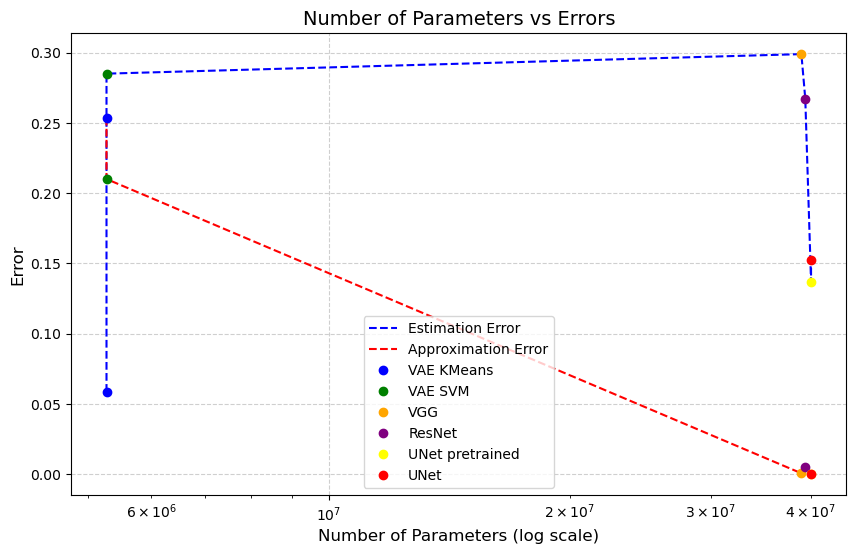

In [26]:
from ClassComp.models.vgg import VGG, Small_VGG
from ClassComp.models.resnet import ResNet
from ClassComp.models.unet import UNet
from ClassComp.models.vae import VAE

vgg = VGG(32,1)
svgg = Small_VGG(32, 1)
resnet = ResNet(32)
unet = UNet(32)
vae = VAE(32**2, 32**2, 8)

print(f"VGG: {count_trainable_parameters(vgg)}")
print(f"Small VGG: {count_trainable_parameters(svgg)}")
print(f"Resnet: {count_trainable_parameters(resnet)}")
print(f"UNet: {count_trainable_parameters(unet)}")
print(f"VAE: {count_trainable_parameters(vae)}")


import matplotlib.pyplot as plt

# Example data
errors = {
    'VAE KMeans': [0.0586, 0.2536],
    'VAE SVM': [0.2850000000000001, 0.20999999999999996],
    
    'VGG': [0.2989, 0.0006000000000000005],
    'ResNet': [0.2672, 0.005400000000000005],
    'UNet pretrained': [0.13679999999999998, 0.0],
    'UNet': [0.15259999999999999, 0.0],
    
}

parameters = {
    'VAE KMeans': count_trainable_parameters(vae) - 18,
    'VAE SVM': count_trainable_parameters(vae),
    
    'VGG': count_trainable_parameters(vgg),  # Replace with actual number of parameters
    'ResNet': count_trainable_parameters(resnet),
    'UNet pretrained': count_trainable_parameters(unet),
    'UNet': count_trainable_parameters(unet),
}

models = list(errors.keys())
param_values = [parameters[model] for model in models]
estimation_errors = [errors[model][0] for model in models]
approximation_errors = [errors[model][1] for model in models]

# Colors for each model
colors = ['blue', 'green', 'orange', 'purple', 'yellow', 'red']

# Plot
plt.figure(figsize=(10, 6))

plt.plot(param_values, estimation_errors, '--', label='Estimation Error', color='blue')
plt.plot(param_values, approximation_errors, '--', label='Approximation Error', color='red')


for i, model in enumerate(models):
    plt.plot(param_values[i], estimation_errors[i], 'o', color=colors[i], label=f'{model}')
    plt.plot(param_values[i], approximation_errors[i], 'o', color=colors[i])

# Add labels and title
plt.xlabel('Number of Parameters (log scale)', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Number of Parameters vs Errors', fontsize=14)
plt.xscale('log')  # Use log scale for parameters
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10, loc='best')

# Show plot
# plt.savefig("results/image/tradeoff.png", bbox_inches="tight", dpi=300)
plt.show()

In [23]:
with open("results/errors/final_averages_our_models.pkl", "wb") as f:
    pickle.dump(final_averages, f)
    f.close()

In [24]:
with open("results/errors/final_averages_our_models.pkl", "rb") as f:
    d = pickle.load(f)
    f.close()
d

{'VGG': [0.18050000000000002, 0.0],
 'ResNet': [0.49400000000000005, 0.00012499999999999735],
 'UNet pretrained': [0.505, 0.0],
 'UNet': [0.0, 0.0],
 'VAE SVM': [0.2850000000000001, 0.20999999999999996],
 'VAE KMeans': [-0.0012499999999999734, 0.49624999999999997]}

In [18]:
from ClassComp.models.vae import VAE
from ClassComp.data_utils.loaders import get_mnist, get_dataloader
from ClassComp.utils.wasserstein import replicated_slice_wasserstein_generic, get_original_and_reconstructed_images
# Get binary MNIST subsets
train_subset, test_subset = get_mnist()

# Get DataLoaders with additional transformations
train_loader, test_loader = get_dataloader(train_subset, test_subset, size=64, batch_size=8)

model = VAE(64**2, 32**2, 8).to("cuda")
model.load_state_dict(torch.load("results/models/vae_20_epochs_0.001_lr_vanilla_generation.pth.tar", map_location="cuda"))

d = get_original_and_reconstructed_images(model, test_loader, "cuda")

print(
    f"The SWD on 0s {replicated_slice_wasserstein_generic(d['original_0'], d['reconstructed_0'], n_samples=100, n_slices=100, n_rep=10)} \n"
    f"The SWD on 1s {replicated_slice_wasserstein_generic(d['original_1'], d['reconstructed_1'], n_samples=100, n_slices=100, n_rep=10)} \n"
)


/tmp/ipykernel_387914/1275535126.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("results/models/vae_20_epochs_0.001_lr_vanilla_generat

The SWD on 0s 0.06515990345453593 
The SWD on 1s 0.03953195933277586 



In [19]:
print(
    f"The SWD between 0 and 1 {replicated_slice_wasserstein_generic(d['original_0'], d['original_1'], n_samples=100, n_slices=100, n_rep=10)} \n"
)

The SWD between 0 and 1 0.15206970941288656 



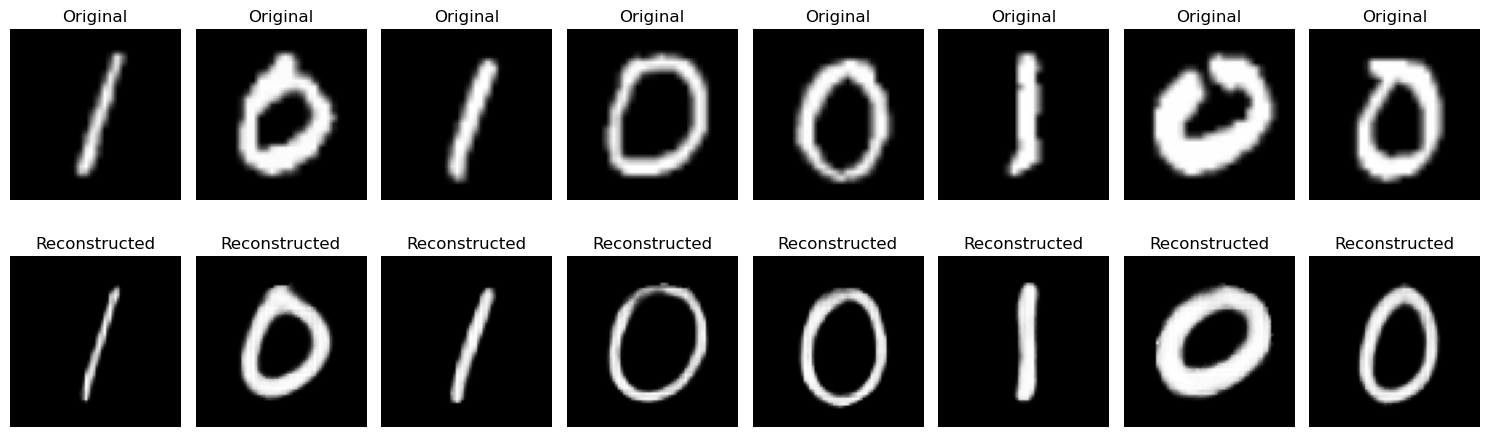

In [9]:
from ClassComp.utils.visualization import plot_vae_outputs

plot_vae_outputs(model, test_loader)


### Training monitoring

In [ ]:
import torch
from torchvision import transforms
import gc

from ClassComp.models.vgg import VGG
from ClassComp.models.resnet import ResNet
from ClassComp.models.unet import UNet
from ClassComp.models.vae import VAE, SVMLoss, VAE_conv
from ClassComp.data_utils.loaders import get_mnist, get_dataloader
from ClassComp.experiments.train import train_binary_classifier, train_vae, train_vae_kmeans

def del_model(model):
    del model
    torch.cuda.reset_peak_memory_stats()
    torch.cuda.reset_accumulated_memory_stats()
    torch.cuda.empty_cache()
    gc.collect()

# Vanilla training

image_size = 64
batch_size = 16
custom_transforms = None
epochs = 10
learning_rates = [1e-3,1e-5]
description = "vanilla"

## Get binary MNIST subsets
train_subset, test_subset = get_mnist()

## Get DataLoaders with additional transformations
train_loader, test_loader = get_dataloader(train_subset, test_subset, transform=custom_transforms, size=image_size, batch_size=batch_size)

## Train
# for i, lr in enumerate(learning_rates):
    # print("Training VGG")
    # vgg = VGG(input_img_size=image_size, input_img_c=1)
    # train_binary_classifier(vgg, train_loader, test_loader, epochs=epochs, learning_rate=lr, device="cuda", save_results=True, description=description)

    # if i == 0:
    #     torch.save(vgg.state_dict(), f"./results/models/vgg_{epochs}_epochs_{lr}_lr_{description}.pth.tar")

#     del_model(vgg)

    # print("Training Resnet")
    # resnet = ResNet(input_img_size=image_size, input_img_c=1)
    # train_binary_classifier(resnet, train_loader, test_loader, epochs=epochs, learning_rate=lr, device="cuda", save_results=True, description=description)

    # if i == 0:
    #     resnet_path = f"./results/models/resnet_{epochs}_epochs_{lr}_lr_{description}.pth.tar"
    #     torch.save(resnet.state_dict(), resnet_path)

    # del_model(resnet)

    # print("Training Unet")
    # for j in range(2):
    #     if j == 0:
    #         resnet = ResNet(input_img_size=image_size, input_img_c=1)  
    #         unet_description = description + "_pretrained_resnet"
    #         resnet.load_state_dict(torch.load(resnet_path))
    #         resnet.eval()
    #         resnet.to("cuda")
    #         unet = UNet(image_size, resnet)
    #     else:
    #         unet_description = description + "no_pretraining"
    #         unet = UNet(image_size)
        
        
    #     train_binary_classifier(unet, train_loader, test_loader, epochs=epochs, learning_rate=lr, device="cuda", save_results=True, description=unet_description)

    #     if i == 0:
    #         torch.save(unet.state_dict(), f"./results/models/unet_{epochs}_epochs_{lr}_lr_{unet_description}.pth.tar")

    #     del_model(unet)

    # print("Training VAE")
    # # for j in range(2):
    # vae = VAE(image_size**2, 32*32, 8, beta=0.05)
    #     # if j == 0:
    #     #     resnet = ResNet(input_img_size=image_size, input_img_c=1)  
    #     #     resnet.load_state_dict(torch.load(resnet_path))
    #     #     resnet.eval()
    #     #     resnet.to("cuda")
    #     #     vae = VAE_conv(image_size, resnet)
    #     #     vae_description = description + "_pretrained_resnet"
    #     # else:
    #     #     vae_description = description + "no_pretraining"
    #     #     vae = VAE_conv(image_size)

    # train_vae(vae, train_loader, test_loader, epochs=epochs, learning_rate=lr, device="cuda", save_results=True, description=description)

    # if i == 0:
    #     torch.save(vae.state_dict(), f"./results/models/vae_{epochs}_epochs_{lr}_lr_{description}_generation.pth.tar")

    # vae.classification_mode = "SVM"

    # # Train VAE classification head
    # criterion = SVMLoss()
    # for param in vae.parameters():
    #     param.requires_grad = False
    # for name, param in vae.named_parameters():
    #     if "svm_layer" in name:
    #         param.requires_grad = True
    # train_binary_classifier(vae, train_loader, test_loader, criterion=criterion, epochs=epochs, learning_rate=lr, device="cuda", save_results=True, description=description)

    # if i == 0:
    #     torch.save(vae.state_dict(), f"./results/models/vae_{epochs}_epochs_{lr}_lr_{description}_classification.pth.tar")

    # del_model(vae)



Training VAE


Epoch [1/20], Training Loss: 58403.6508, Reconstruction Loss: 58378.3490, KLD Loss: 506.0357, Time: 15.40s, Gradient Norm: 2.0402
Epoch [1/20], Validation Loss: 56587.6938, Validation Recon: 56570.2873, Validation KLD: 348.1263


Epoch [2/20], Training Loss: 56937.3357, Reconstruction Loss: 56918.2974, KLD Loss: 380.7629, Time: 28.71s, Gradient Norm: 1.9979
Epoch [2/20], Validation Loss: 55686.9130, Validation Recon: 55665.9393, Validation KLD: 419.4764


KeyboardInterrupt: 

In [ ]:
# Noisy training

image_size = 64
batch_size = 16

class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)
    
custom_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # 50% chance of horizontal flip
    transforms.RandomVerticalFlip(p=0.5),    # 50% chance of vertical flip
    transforms.RandomAffine(
        degrees=30,                          # Random rotation within ±30 degrees
        translate=(0.1, 0.1),                # Random translation up to 10% of image size
        scale=(0.9, 1.1),                    # Random scaling between 90% and 110%
        shear=10                             # Random shear within ±10 degrees
    ),
    transforms.RandomPerspective(
        distortion_scale=0.5,                # Distortion scale for perspective transform
        p=0.5                                # 50% chance of applying
    ),
    transforms.RandomErasing(
        p=0.5,                               # 50% chance of applying
        scale=(0.02, 0.2),                   # Proportion of erased area
        ratio=(0.3, 3.3),                    # Aspect ratio of erased area
        value=0                              # Fill value for erased pixels
    ),
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),  # Add Gaussian Blur
    transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.5),  # Adjust sharpness
    AddGaussianNoise(),
])
epochs = 20
learning_rates = [1e-3, 1e-5]
description = "class_imbalance_noisy"

## Get binary MNIST subsets
train_subset, test_subset = get_mnist()

## Get DataLoaders with additional transformations
train_loader, test_loader = get_dataloader(train_subset, test_subset, transform=custom_transforms, size=image_size, batch_size=batch_size, class_imbalance=0.6)

## Train
for i, lr in enumerate(learning_rates):
    print("Training VGG")
    vgg = VGG(input_img_size=image_size, input_img_c=1)
    train_binary_classifier(vgg, train_loader, test_loader, epochs=epochs, learning_rate=lr, device="cuda", save_results=True, description=description)

    if i == 0:
        torch.save(vgg.state_dict(), f"./results/models/vgg_{epochs}_epochs_{lr}_lr_{description}.pth.tar")

    del_model(vgg)

    print("Training Resnet")
    resnet = ResNet(input_img_size=image_size, input_img_c=1)
    train_binary_classifier(resnet, train_loader, test_loader, epochs=epochs, learning_rate=lr, device="cuda", save_results=True, description=description)

    if i == 0:
        resnet_path = f"./results/models/resnet_{epochs}_epochs_{lr}_lr_{description}.pth.tar"
        torch.save(resnet.state_dict(), resnet_path)

    del_model(resnet)

    print("Training Unet")
    for j in range(2):
        if j == 0:
            resnet = ResNet(input_img_size=image_size, input_img_c=1)  
            unet_description = description + "_pretrained_resnet"
            resnet.load_state_dict(torch.load(resnet_path))
            resnet.eval()
            resnet.to("cuda")
            unet = UNet(image_size, resnet)
        else:
            unet_description = description + "no_pretraining"
            unet = UNet(image_size)

        train_binary_classifier(unet, train_loader, test_loader, epochs=epochs, learning_rate=lr, device="cuda", save_results=True, description=unet_description)

        if i == 0:
            torch.save(unet.state_dict(), f"./results/models/unet_{epochs}_epochs_{lr}_lr_{unet_description}.pth.tar")

        del_model(unet)

    print("Training VAE")
    # for j in range(2):
    vae = VAE(image_size**2, 32*32, 8, beta=0.05)
        

    train_vae(vae, train_loader, test_loader, epochs=epochs, learning_rate=lr, device="cuda", save_results=True, description=description)

    if i == 0:
        torch.save(vae.state_dict(), f"./results/models/vae_{epochs}_epochs_{lr}_lr_{description}_generation.pth.tar")

    vae.classification_mode = "SVM"

    # Train VAE classification head
    criterion = SVMLoss()
    for param in vae.parameters():
        param.requires_grad = False
    for name, param in vae.named_parameters():
        if "svm_layer" in name:
            param.requires_grad = True
    train_binary_classifier(vae, train_loader, test_loader, criterion=criterion, epochs=epochs, learning_rate=lr, device="cuda", save_results=True, description=description)

    if i == 0:
        torch.save(vae.state_dict(), f"./results/models/vae_{epochs}_epochs_{lr}_lr_{description}_classification.pth.tar")

    train_vae_kmeans(vae, train_loader, test_loader, "cuda", True, description)


    del_model(vae)

    # print("Training VAE")
    # for j in range(2):
    #     resnet = ResNet(input_img_size=image_size, input_img_c=1)  
    #     if j == 0:
    #         resnet = ResNet(input_img_size=image_size, input_img_c=1)  
    #         resnet.load_state_dict(torch.load(resnet_path))
    #         resnet.eval()
    #         resnet.to("cuda")
    #         vae = VAE_conv(image_size, resnet)
    #         vae_description = description + "_pretrained_resnet"
    #     else:
    #         vae_description = description + "no_pretraining"
    #         vae = VAE_conv(image_size)

    #     train_vae(vae, train_loader, test_loader, epochs=epochs, learning_rate=lr, device="cuda", save_results=True, description=vae_description)

    #     if i == 0:
    #         torch.save(vae.state_dict(), f"./results/models/vae_{epochs}_epochs_{lr}_lr_{vae_description}_generation.pth.tar")

    #     vae.classification_mode = True

    #     # Train VAE classification head
    #     criterion = SVMLoss()
    #     for param in vae.parameters():
    #         param.requires_grad = False
    #     for name, param in vae.named_parameters():
    #         if "svm_layer" in name:
    #             param.requires_grad = True
    #     train_binary_classifier(vae, train_loader, test_loader, criterion=criterion, epochs=epochs, learning_rate=lr, device="cuda", save_results=True, description=vae_description)

    #     if i == 0:
    #         torch.save(vae.state_dict(), f"./results/models/vae_{epochs}_epochs_{lr}_lr_{vae_description}_classification.pth.tar")

    #     del_model(vae)

In [ ]:
# Strong class imbalance

image_size = 64
batch_size = 16

class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)
    
custom_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # 50% chance of horizontal flip
    transforms.RandomVerticalFlip(p=0.5),    # 50% chance of vertical flip
    transforms.RandomAffine(
        degrees=30,                          # Random rotation within ±30 degrees
        translate=(0.1, 0.1),                # Random translation up to 10% of image size
        scale=(0.9, 1.1),                    # Random scaling between 90% and 110%
        shear=10                             # Random shear within ±10 degrees
    ),
    transforms.RandomPerspective(
        distortion_scale=0.5,                # Distortion scale for perspective transform
        p=0.5                                # 50% chance of applying
    ),
    transforms.RandomErasing(
        p=0.5,                               # 50% chance of applying
        scale=(0.02, 0.2),                   # Proportion of erased area
        ratio=(0.3, 3.3),                    # Aspect ratio of erased area
        value=0                              # Fill value for erased pixels
    ),
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),  # Add Gaussian Blur
    transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.5),  # Adjust sharpness
    AddGaussianNoise(),
])
epochs = 20
learning_rates = [1e-3, 1e-5]
description = "class_imbalance_strong"

## Get binary MNIST subsets
train_subset, test_subset = get_mnist()

## Get DataLoaders with additional transformations
train_loader, test_loader = get_dataloader(train_subset, test_subset, transform=None, size=image_size, batch_size=batch_size, class_imbalance=0.9)

## Train
for i, lr in enumerate(learning_rates):
    print("Training VGG")
    vgg = VGG(input_img_size=image_size, input_img_c=1)
    train_binary_classifier(vgg, train_loader, test_loader, epochs=epochs, learning_rate=lr, device="cuda", save_results=True, description=description)

    if i == 0:
        torch.save(vgg.state_dict(), f"./results/models/vgg_{epochs}_epochs_{lr}_lr_{description}.pth.tar")

    del_model(vgg)

    print("Training Resnet")
    resnet = ResNet(input_img_size=image_size, input_img_c=1)
    train_binary_classifier(resnet, train_loader, test_loader, epochs=epochs, learning_rate=lr, device="cuda", save_results=True, description=description)

    if i == 0:
        resnet_path = f"./results/models/resnet_{epochs}_epochs_{lr}_lr_{description}.pth.tar"
        torch.save(resnet.state_dict(), resnet_path)

    del_model(resnet)

    print("Training Unet")
    for j in range(2):
        if j == 0:
            resnet = ResNet(input_img_size=image_size, input_img_c=1)  
            unet_description = description + "_pretrained_resnet"
            resnet.load_state_dict(torch.load(resnet_path))
            resnet.eval()
            resnet.to("cuda")
            unet = UNet(image_size, resnet)
        else:
            unet_description = description + "no_pretraining"
            unet = UNet(image_size)

        train_binary_classifier(unet, train_loader, test_loader, epochs=epochs, learning_rate=lr, device="cuda", save_results=True, description=unet_description)

        if i == 0:
            torch.save(unet.state_dict(), f"./results/models/unet_{epochs}_epochs_{lr}_lr_{unet_description}.pth.tar")

        del_model(unet)

    print("Training VAE")
    # for j in range(2):
    vae = VAE(image_size**2, 32*32, 8, beta=0.05)
        

    train_vae(vae, train_loader, test_loader, epochs=epochs, learning_rate=lr, device="cuda", save_results=True, description=description)

    if i == 0:
        torch.save(vae.state_dict(), f"./results/models/vae_{epochs}_epochs_{lr}_lr_{description}_generation.pth.tar")

    vae.classification_mode = "SVM"

    # Train VAE classification head
    criterion = SVMLoss()
    for param in vae.parameters():
        param.requires_grad = False
    for name, param in vae.named_parameters():
        if "svm_layer" in name:
            param.requires_grad = True
    train_binary_classifier(vae, train_loader, test_loader, criterion=criterion, epochs=epochs, learning_rate=lr, device="cuda", save_results=True, description=description)

    if i == 0:
        torch.save(vae.state_dict(), f"./results/models/vae_{epochs}_epochs_{lr}_lr_{description}_classification.pth.tar")

    train_vae_kmeans(vae, train_loader, test_loader, "cuda", True, description)


    del_model(vae)

    # print("Training VAE")
    # for j in range(2):
    #     resnet = ResNet(input_img_size=image_size, input_img_c=1)  
    #     if j == 0:
    #         resnet = ResNet(input_img_size=image_size, input_img_c=1)  
    #         resnet.load_state_dict(torch.load(resnet_path))
    #         resnet.eval()
    #         resnet.to("cuda")
    #         vae = VAE_conv(image_size, resnet)
    #         vae_description = description + "_pretrained_resnet"
    #     else:
    #         vae_description = description + "no_pretraining"
    #         vae = VAE_conv(image_size)

    #     train_vae(vae, train_loader, test_loader, epochs=epochs, learning_rate=lr, device="cuda", save_results=True, description=vae_description)

    #     if i == 0:
    #         torch.save(vae.state_dict(), f"./results/models/vae_{epochs}_epochs_{lr}_lr_{vae_description}_generation.pth.tar")

    #     vae.classification_mode = True

    #     # Train VAE classification head
    #     criterion = SVMLoss()
    #     for param in vae.parameters():
    #         param.requires_grad = False
    #     for name, param in vae.named_parameters():
    #         if "svm_layer" in name:
    #             param.requires_grad = True
    #     train_binary_classifier(vae, train_loader, test_loader, criterion=criterion, epochs=epochs, learning_rate=lr, device="cuda", save_results=True, description=vae_description)

    #     if i == 0:
    #         torch.save(vae.state_dict(), f"./results/models/vae_{epochs}_epochs_{lr}_lr_{vae_description}_classification.pth.tar")

    #     del_model(vae)

/tmp/ipykernel_9530/3824434198.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("tab20b", num_runs)  # Use 'tab10' colormap with one color per run


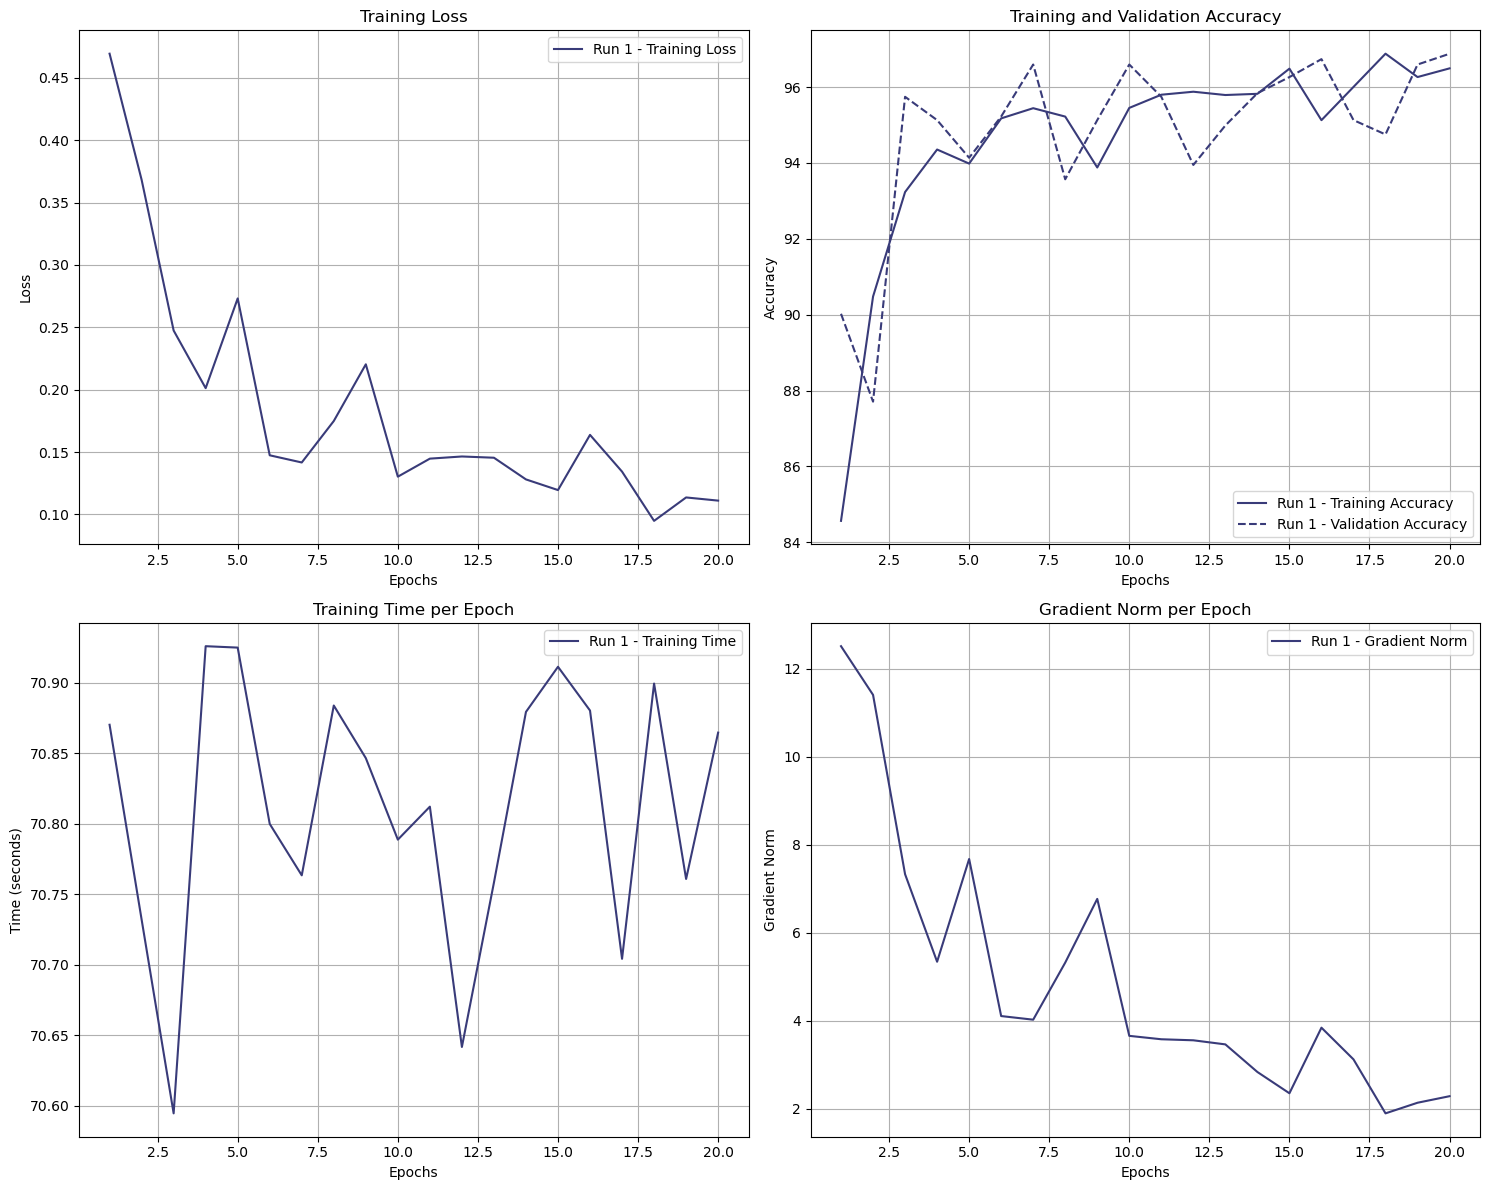

In [27]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.cm as cm


path = "results/training/ResNet_20_epochs_0.001_lr_noisy.pkl"
with open(path, "rb") as f:
    d = pickle.load(f)
    f.close()


def plot_training_metrics(metrics_list):
    """
    Plots training metrics from a list of dictionaries.
    
    Args:
        metrics_list (list): List of dictionaries containing training metrics.
            Each dictionary should have keys:
                - 'name': A string representing the name of the training run.
                - 'training_loss': List of training loss values.
                - 'training_accuracy': List of training accuracy values.
                - 'validation_accuracy': List of validation accuracy values.
                - 'training_time': List of training time values per epoch.
                - 'gradient_norm': List of gradient norms per epoch.
    """
    if not metrics_list:
        print("No metrics provided for plotting.")
        return
    
    # Generate a consistent color map for all runs
    num_runs = len(metrics_list)
    color_map = cm.get_cmap("tab20b", num_runs)  # Use 'tab10' colormap with one color per run

    # Prepare figure
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    loss_ax, acc_ax, time_ax, grad_ax = axes.flatten()

    for idx, metrics in enumerate(metrics_list):
        name = metrics.get("name", f"Run {idx + 1}")
        color = color_map(idx)  # Get the color for this run
        epochs = list(range(1, len(metrics['training_loss']) + 1))
        
        # Plot training loss
        loss_ax.plot(epochs, metrics['training_loss'], label=f"{name} - Training Loss", color=color)
        
        # Plot training and validation accuracy
        acc_ax.plot(epochs, metrics['training_accuracy'], label=f"{name} - Training Accuracy", color=color)
        acc_ax.plot(epochs, metrics['validation_accuracy'], linestyle='--', label=f"{name} - Validation Accuracy", color=color)
        
        # Plot training time per epoch
        time_ax.plot(epochs, metrics['training_time'], label=f"{name} - Training Time", color=color)
        
        # Plot gradient norm per epoch
        grad_ax.plot(epochs, metrics['gradient_norm'], label=f"{name} - Gradient Norm", color=color)
    
    # Set titles and labels for each plot
    loss_ax.set_title("Training Loss")
    loss_ax.set_xlabel("Epochs")
    loss_ax.set_ylabel("Loss")
    loss_ax.legend()
    loss_ax.grid(True)
    
    acc_ax.set_title("Training and Validation Accuracy")
    acc_ax.set_xlabel("Epochs")
    acc_ax.set_ylabel("Accuracy")
    acc_ax.legend()
    acc_ax.grid(True)
    
    time_ax.set_title("Training Time per Epoch")
    time_ax.set_xlabel("Epochs")
    time_ax.set_ylabel("Time (seconds)")
    time_ax.legend()
    time_ax.grid(True)
    
    grad_ax.set_title("Gradient Norm per Epoch")
    grad_ax.set_xlabel("Epochs")
    grad_ax.set_ylabel("Gradient Norm")
    grad_ax.legend()
    grad_ax.grid(True)

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()


plot_training_metrics([d])

/tmp/ipykernel_9530/3824434198.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("tab20b", num_runs)  # Use 'tab10' colormap with one color per run


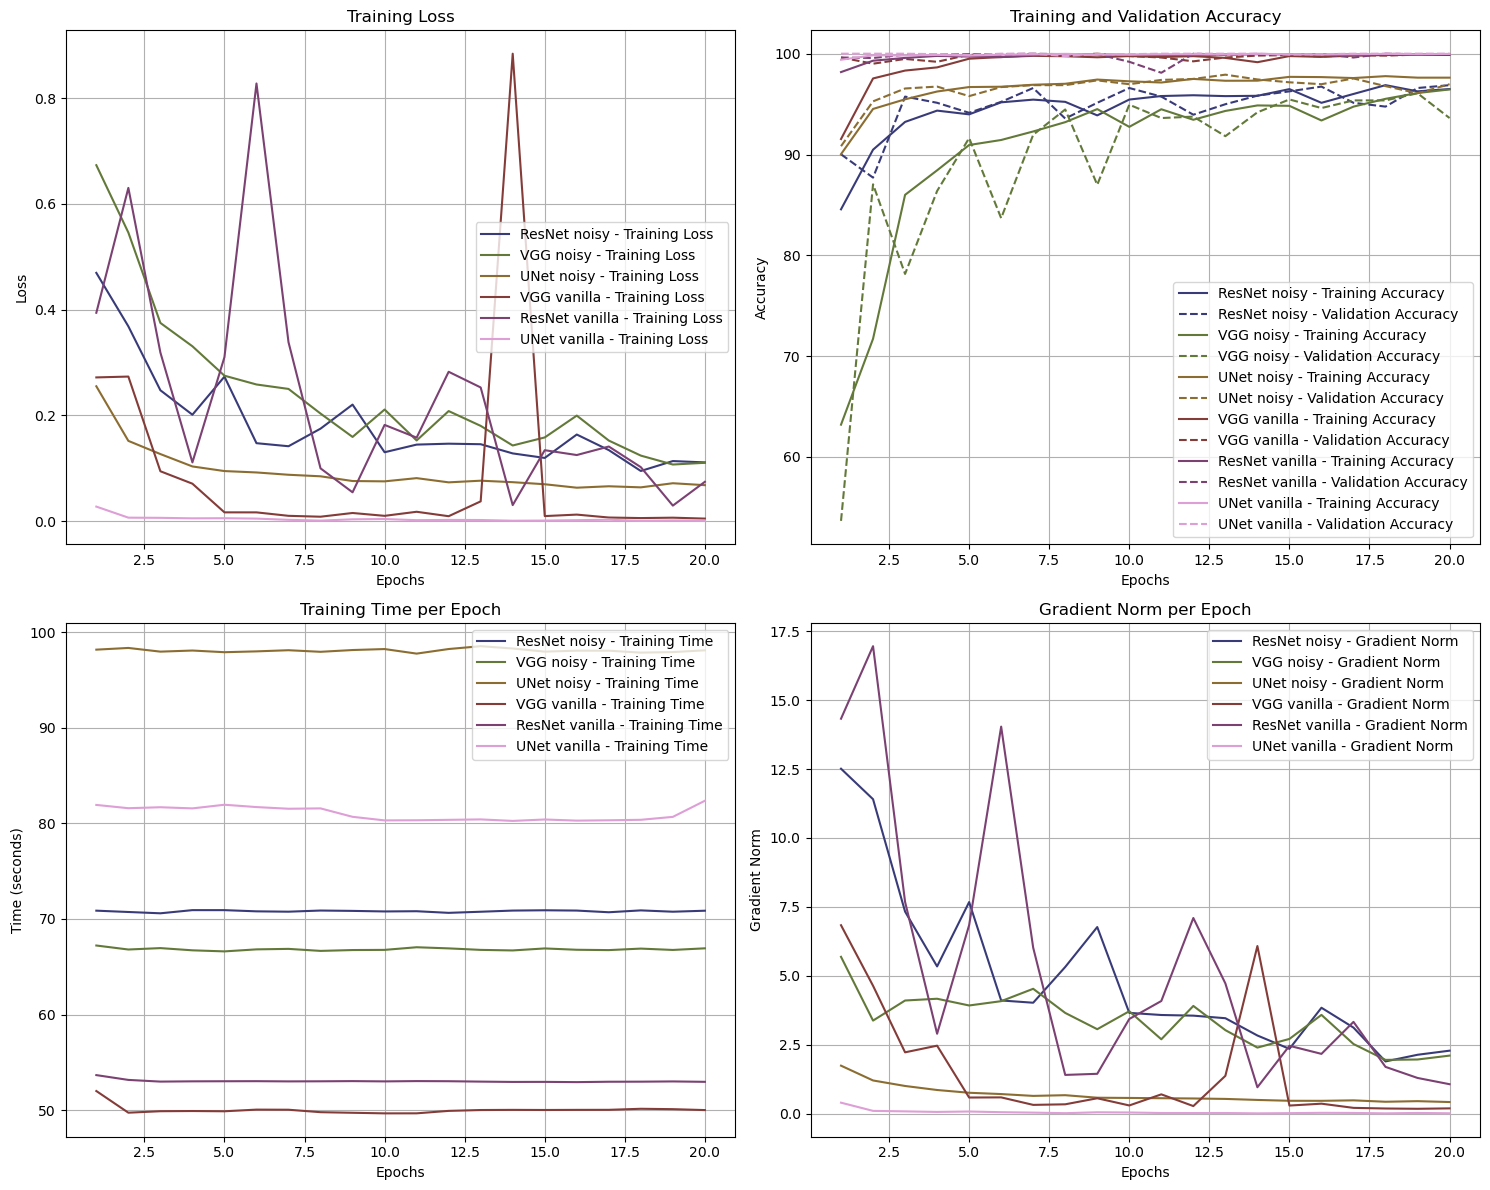

In [29]:
path = "results/training/ResNet_20_epochs_0.001_lr_noisy.pkl"
with open(path, "rb") as f:
    d1 = pickle.load(f)
    f.close()
d1["name"] = "ResNet noisy"

path = "results/training/ResNet_20_epochs_0.001_lr_vanilla.pkl"
with open(path, "rb") as f:
    d2 = pickle.load(f)
    f.close()
d2["name"] = "ResNet vanilla"

path = "results/training/VGG_20_epochs_0.001_lr_noisy.pkl"
with open(path, "rb") as f:
    d3 = pickle.load(f)
    f.close()
d3["name"] = "VGG noisy"

path = "results/training/VGG_20_epochs_0.001_lr_vanilla.pkl"
with open(path, "rb") as f:
    d4 = pickle.load(f)
    f.close()
d4["name"] = "VGG vanilla"

path = "results/training/UNet_20_epochs_0.001_lr_noisyno_pretraining.pkl"
with open(path, "rb") as f:
    d5 = pickle.load(f)
    f.close()
d5["name"] = "UNet noisy"

path = "results/training/UNet_20_epochs_0.001_lr_vanillano_pretraining.pkl"
with open(path, "rb") as f:
    d6 = pickle.load(f)
    f.close()
d6["name"] = "UNet vanilla"


plot_training_metrics([d1, d3, d5, d4, d2, d6])

In [18]:
d1["validation_accuracy"]

[90.02364066193853,
 87.70685579196217,
 95.74468085106383,
 95.13002364066193,
 94.13711583924349,
 95.22458628841608,
 96.59574468085107,
 93.56973995271868,
 95.13002364066193,
 96.59574468085107,
 95.74468085106383,
 93.94799054373523,
 94.98817966903073,
 95.83924349881796,
 96.26477541371159,
 96.73758865248227,
 95.13002364066193,
 94.7517730496454,
 96.59574468085107,
 96.87943262411348]